In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.array(range(25))
y = X ** 1.3 + np.random.normal(10, 10, X.shape[0])

In [3]:
y = y.reshape((-1, 1))
X = X.reshape((-1, 1))

Text(0.5, 0, 'X')

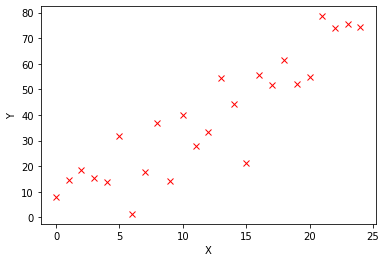

In [4]:
plt.plot(X, y, 'rx', 10)
plt.ylabel('Y')
plt.xlabel('X')

In [5]:
X = np.append(np.ones((X.shape[0], 1)), X, axis = 1)

In [6]:
def cost(X, y, theta):
    h = np.dot(X, theta)
    J = np.sum((h - y) * ( h - y))/(2 * len(y))
    return J if J else 0 

In [7]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)      
    costs = [] 
    
    for _ in range(num_iters):  
        h = np.dot(X,theta)     
        theta -= alpha * (np.sum((h - y) * X, axis = 0)).reshape(theta.shape[0], 1)/m
        costs.append(cost(X, y, theta))
    return theta, costs

In [8]:
alpha = 0.01
num_iters = 100

In [9]:
theta = np.zeros((X.shape[1], 1), dtype = np.float64)
theta, costs = gradient_descent(X, y, theta, alpha, num_iters)
theta

array([[1.18259778],
       [2.95496167]])

In [10]:
predicted = np.dot(X, theta)

In [11]:
costs[:5]

[957.9241752002166,
 899.800991834967,
 845.4097644967819,
 794.5108283258684,
 746.8799098878173]

Text(0.5, 0, 'X')

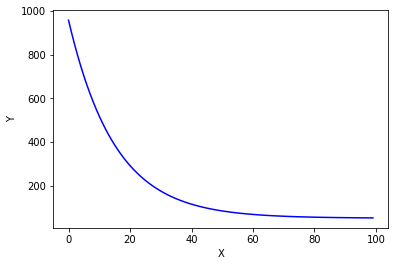

In [12]:
plt.plot(costs, 'b')
plt.ylabel('Y')
plt.xlabel('X')

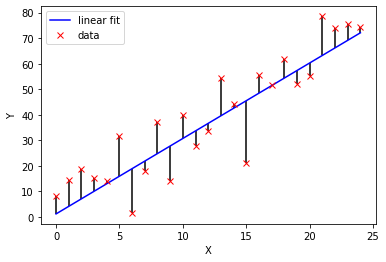

In [13]:
plt.plot(X[:, 1:], predicted, 'b')
plt.plot(X[:, 1:], y, 'rx', 10)
for i, x in enumerate(X):
    plt.vlines(x[1], min(predicted[i], y[i]), max(predicted[i], y[i]))
plt.ylabel('Y')
plt.xlabel('X')
plt.legend(('linear fit', 'data'))
plt.show()